In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Heart Failure Prediction.csv')
cols_to_fill = ["RestingBP", "Cholesterol"]
for col in cols_to_fill:
    mean_value = df[col][df[col] != 0].mean()  # Tính mean bỏ qua các giá trị 0
    df[col] = df[col].replace(0, mean_value)  # Thay thế 0 bằng mean

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


In [4]:
print(df.isna().sum())
print(df.isnull().any())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool


In [5]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


In [8]:
for i in df.columns:
    if(df[i].dtype=='int64'):
        df[i]=df[i].astype('int16')
    else:
        continue
df.dtypes

Age                 int16
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int16
RestingECG         object
MaxHR               int16
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int16
dtype: object

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [11]:
df.shape

(918, 12)

In [12]:
df.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

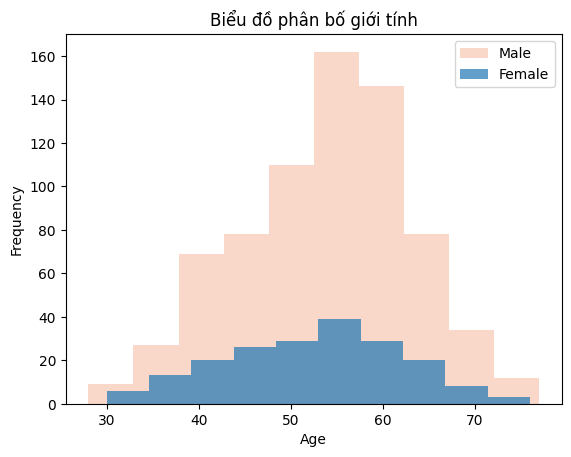

In [13]:
plt.hist(df[df['Sex'] == 'M']['Age'], bins=10, alpha=0.7, label='Male', color='#F7C6B2')  # Màu cam cho nam
plt.hist(df[df['Sex'] == 'F']['Age'], bins=10, alpha=0.7, label='Female', color='#1F77B4')  # Màu xanh dương cho nữ
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Biểu đồ phân bố giới tính')
plt.legend()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7776\1322158663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ChestPainType', palette=colors)


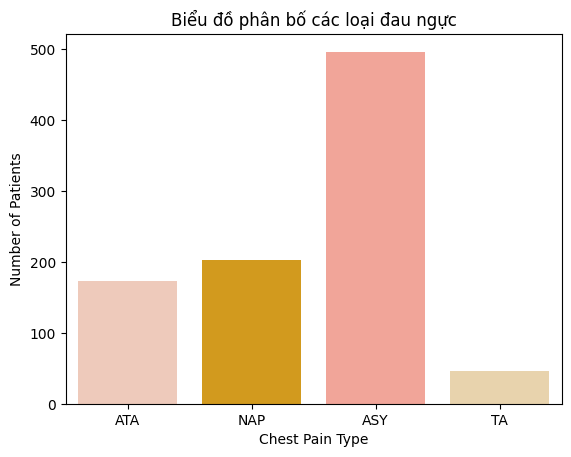

In [14]:
# Định nghĩa các màu cho biểu đồ
colors = ['#F7C6B2', '#F0A500', '#FF9A8B', '#F2D6A3']  # Màu pastel ấm nhẹ

# Vẽ countplot với các màu khác nhau cho mỗi loại 'ChestPainType'
sns.countplot(data=df, x='ChestPainType', palette=colors)

# Đặt nhãn trục và tiêu đề biểu đồ bằng tiếng Anh
plt.xlabel('Chest Pain Type')  # Nhãn trục x (Loại Đau Ngực)
plt.ylabel('Number of Patients')  # Nhãn trục y (Số lượng bệnh nhân)
plt.title('Biểu đồ phân bố các loại đau ngực')  # Tiêu đề biểu đồ (Biểu đồ phân bố các loại đau ngực)

plt.show()


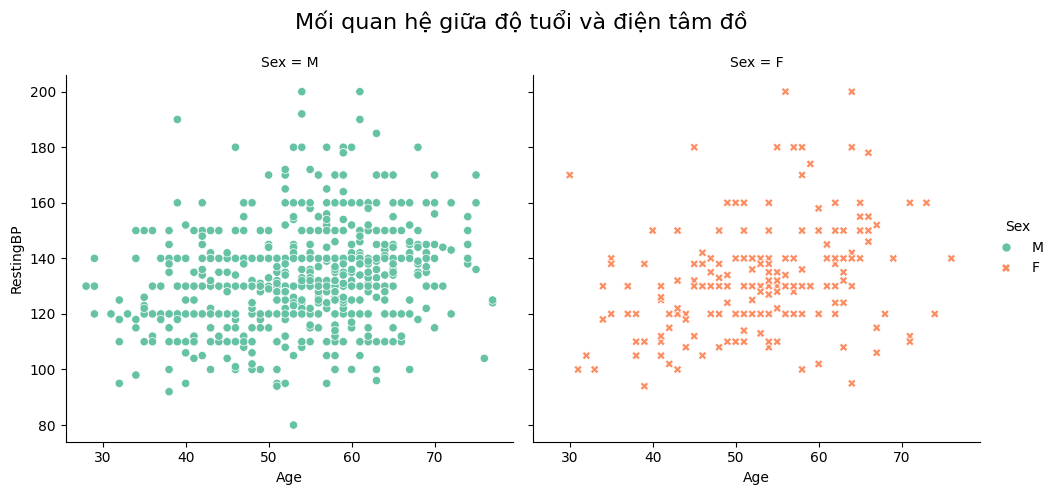

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân tán với màu sắc cho từng giới tính
g = sns.relplot(data=df, x='Age', y='RestingBP', kind='scatter', col='Sex', style='Sex', hue='Sex', palette='Set2')

# Thêm tên biểu đồ
g.fig.suptitle('Mối quan hệ giữa độ tuổi và điện tâm đồ', fontsize=16)

# Điều chỉnh không gian giữa tiêu đề và các biểu đồ con
g.fig.subplots_adjust(top=0.85)

# Hiển thị biểu đồ
plt.show()


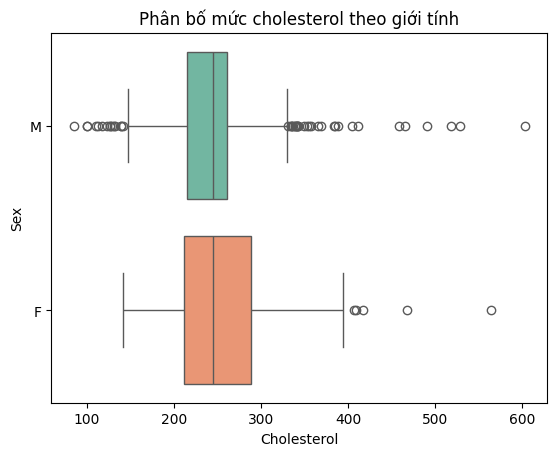

In [16]:
# Vẽ boxplot với màu sắc từ palette 'Set2' cho Cholesterol và phân loại theo giới tính
sns.boxplot(data=df, x='Cholesterol', y='Sex', hue='Sex', palette='Set2')

# Đặt nhãn cho các trục và tiêu đề cho biểu đồ
plt.xlabel('Cholesterol')  # Nhãn trục x (Mức cholesterol)
plt.ylabel('Sex')  # Nhãn trục y (Giới tính)
plt.title('Phân bố mức cholesterol theo giới tính')  # Tiêu đề biểu đồ

# Hiển thị biểu đồ
plt.show()


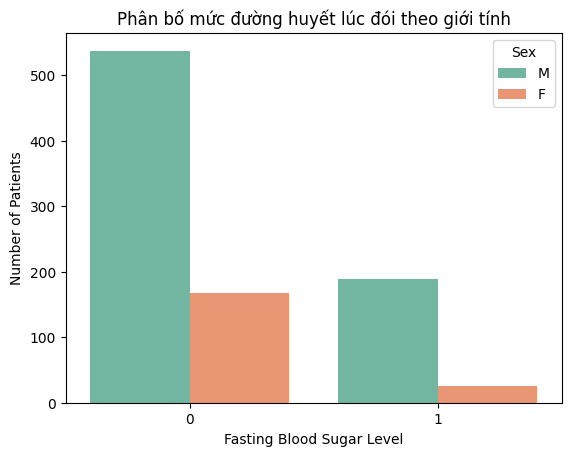

In [17]:
# Vẽ biểu đồ countplot với màu sắc và giới tính cho FastingBS
sns.countplot(data=df, x='FastingBS', hue='Sex', palette='Set2')

# Đặt nhãn cho các trục và tiêu đề cho biểu đồ
plt.xlabel('Fasting Blood Sugar Level')  # Nhãn trục x (Mức đường huyết lúc đói)
plt.ylabel('Number of Patients')  # Nhãn trục y (Số lượng bệnh nhân)
plt.title('Phân bố mức đường huyết lúc đói theo giới tính')  # Tiêu đề biểu đồ

# Hiển thị biểu đồ
plt.show()


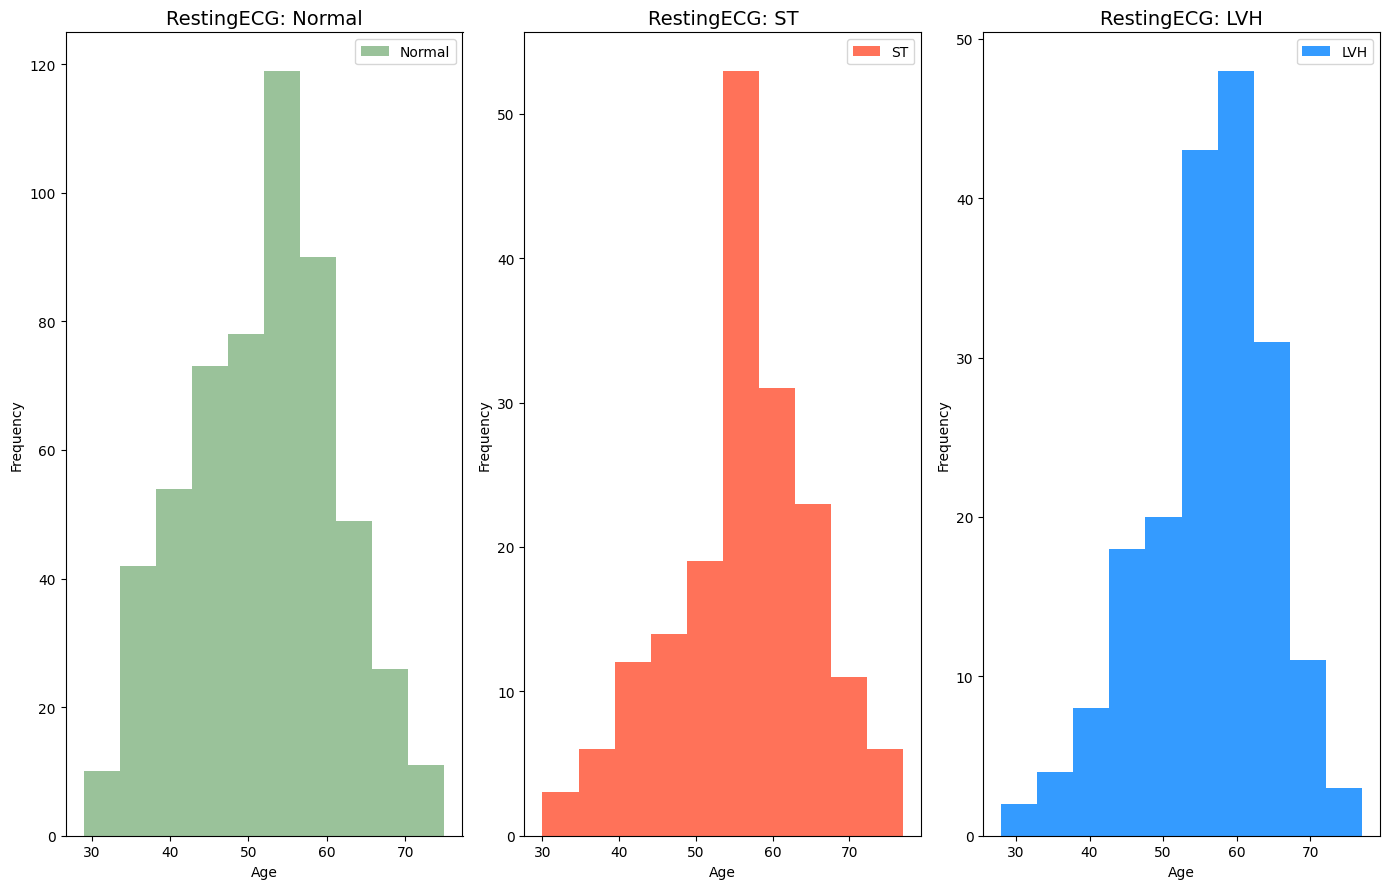

In [18]:
# Lọc dữ liệu theo các nhóm RestingECG
normal_age = df[df['RestingECG'] == 'Normal']['Age']
st_age = df[df['RestingECG'] == 'ST']['Age']
lvh_age = df[df['RestingECG'] == 'LVH']['Age']

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(14, 9))  

# Biểu đồ 1 - Normal
plt.subplot(1, 3, 1)
plt.hist(normal_age, bins=10, alpha=0.9, label='Normal', color='#8FBC8F')  # Màu xanh lá nhẹ
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('RestingECG: Normal', fontsize=14)
plt.legend()

# Biểu đồ 2 - ST
plt.subplot(1, 3, 2)
plt.hist(st_age, bins=10, alpha=0.9, label='ST', color='#FF6347')  # Màu đỏ
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('RestingECG: ST', fontsize=14)
plt.legend()

# Biểu đồ 3 - LVH
plt.subplot(1, 3, 3)
plt.hist(lvh_age, bins=10, alpha=0.9, label='LVH', color='#1E90FF')  # Màu xanh dương
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('RestingECG: LVH', fontsize=14)
plt.legend()

# Sắp xếp lại không gian giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


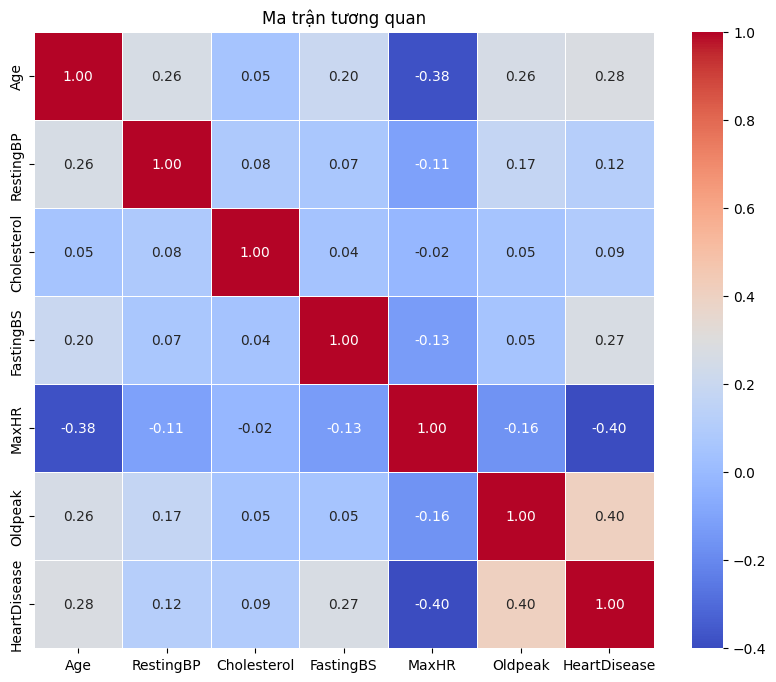

In [19]:
# Lọc các cột dạng số
df_numeric = df.select_dtypes(include=[np.number])

# Tính ma trận tương quan
corr_matrix = df_numeric.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan")
plt.show()

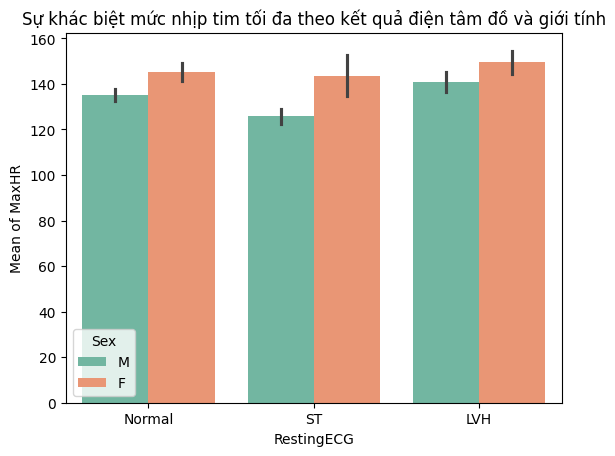

In [20]:
# Thêm màu sắc cho biểu đồ bằng cách sử dụng palette
sns.barplot(x='RestingECG', y='MaxHR', data=df, hue='Sex', palette='Set2')  # 'Set1' là một bảng màu sắc

# Đặt nhãn trục hoành, trục tung và tên cho biểu đồ
plt.xlabel('RestingECG')  
plt.ylabel('Mean of MaxHR')  
plt.title('Sự khác biệt mức nhịp tim tối đa theo kết quả điện tâm đồ và giới tính')  # Tiêu đề biểu đồ
plt.show()  # Hiển thị biểu đồ


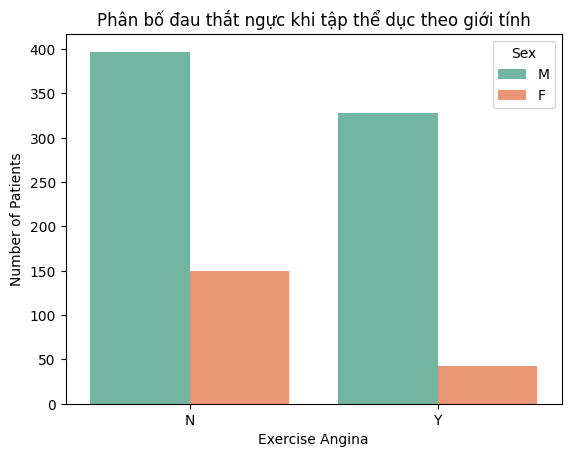

In [21]:
# Vẽ biểu đồ countplot với màu sắc và giới tính cho ExerciseAngina
sns.countplot(data=df, x='ExerciseAngina', hue='Sex', palette='Set2')

# Đặt nhãn cho các trục và tiêu đề cho biểu đồ
plt.xlabel('Exercise Angina')  # Nhãn trục x (đau ngực khi tập thể dục)
plt.ylabel('Number of Patients')  # Nhãn trục y (Số lượng bệnh nhân)
plt.title('Phân bố đau thắt ngực khi tập thể dục theo giới tính')  # Tiêu đề biểu đồ

# Hiển thị biểu đồ
plt.show()


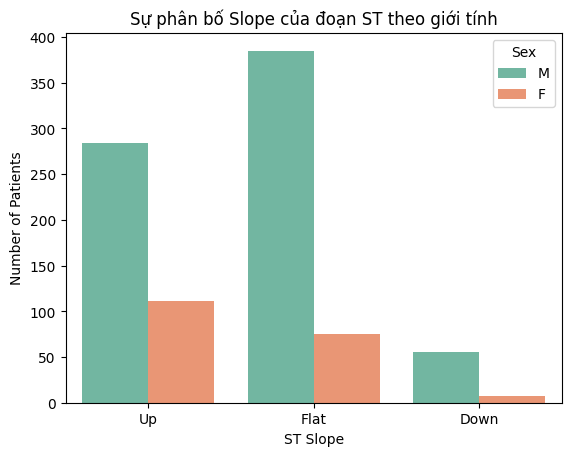

In [22]:
# Chuyển đổi tên cột nếu cần thiết
df['ST_Slope'] = df['ST_Slope'].replace({'Bình thường': 'Normal', 'Đi xuống': 'Downsloping', 'Đi lên': 'Upsloping'})

# Vẽ biểu đồ countplot với màu sắc và giới tính
sns.countplot(data=df, x='ST_Slope', hue='Sex', palette='Set2')

# Đặt nhãn cho các trục và tiêu đề cho biểu đồ bằng tiếng Anh
plt.xlabel('ST Slope')  # Nhãn trục x
plt.ylabel('Number of Patients')  # Nhãn trục y (tiếng Anh)
plt.title('Sự phân bố Slope của đoạn ST theo giới tính')  # Tiêu đề biểu đồ (tiếng Anh)

# Hiển thị biểu đồ
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7776\2453271506.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='MaxHR', palette='Set2')  # Thêm palette cho màu sắc


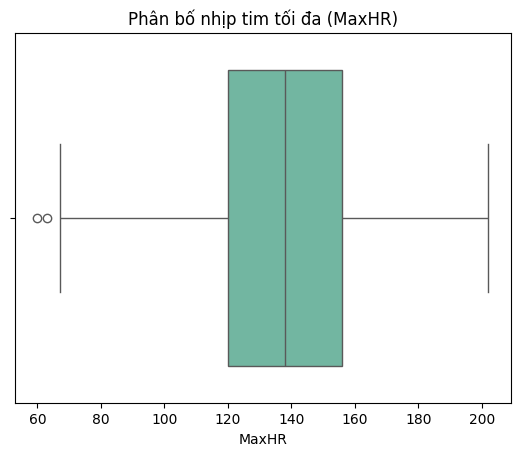

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot cho MaxHR với màu sắc
sns.boxplot(data=df, x='MaxHR', palette='Set2')  # Thêm palette cho màu sắc

# Đặt nhãn cho các trục và tiêu đề cho biểu đồ
plt.xlabel('MaxHR')  # Nhãn trục x (Nhịp tim tối đa)
plt.title('Phân bố nhịp tim tối đa (MaxHR)')  # Tiêu đề biểu đồ

# Hiển thị biểu đồ
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7776\199532633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RestingBP', palette='Set2')  # Thêm palette cho màu sắc


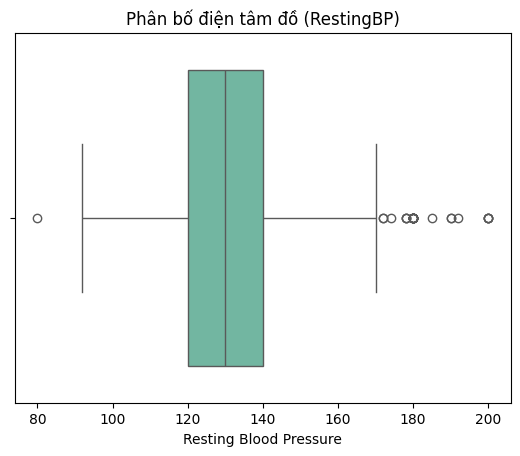

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot cho RestingBP với màu sắc
sns.boxplot(data=df, x='RestingBP', palette='Set2')  # Thêm palette cho màu sắc

# Đặt nhãn cho các trục và tiêu đề cho biểu đồ
plt.xlabel('Resting Blood Pressure')  # Nhãn trục x (Huyết áp lúc nghỉ)
plt.title('Phân bố điện tâm đồ (RestingBP)')  # Tiêu đề biểu đồ

# Hiển thị biểu đồ
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7776\209723959.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Oldpeak', palette='Set2')  # Thêm palette cho màu sắc


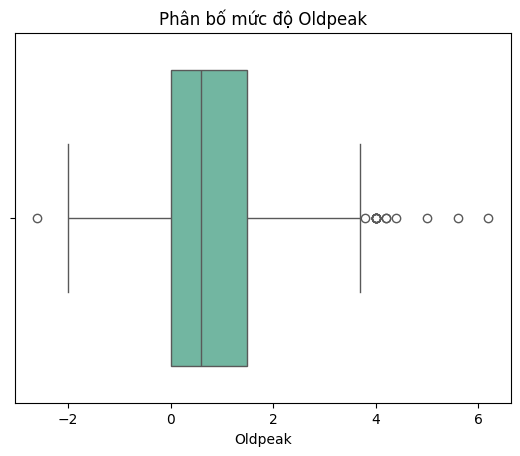

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot cho Oldpeak với màu sắc
sns.boxplot(data=df, x='Oldpeak', palette='Set2')  # Thêm palette cho màu sắc

# Đặt nhãn cho các trục và tiêu đề cho biểu đồ
plt.xlabel('Oldpeak')  # Nhãn trục x (Mức độ Oldpeak)
plt.title('Phân bố mức độ Oldpeak')  # Tiêu đề biểu đồ

# Hiển thị biểu đồ
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7776\2587662491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cholesterol', palette='Set2')  # Thêm palette cho màu sắc


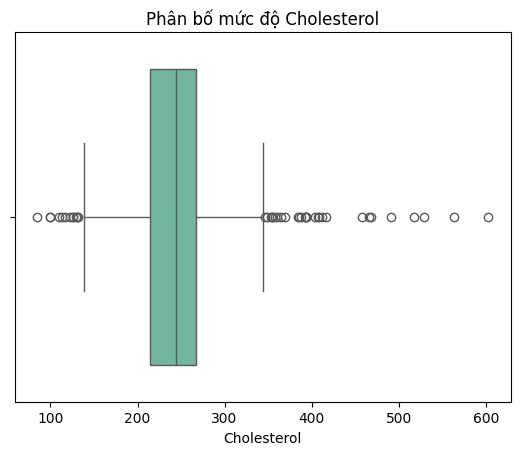

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot cho Cholesterol với màu sắc
sns.boxplot(data=df, x='Cholesterol', palette='Set2')  # Thêm palette cho màu sắc

# Đặt nhãn cho các trục và tiêu đề cho biểu đồ
plt.xlabel('Cholesterol')  # Nhãn trục x (Mức độ Cholesterol)
plt.title('Phân bố mức độ Cholesterol')  # Tiêu đề biểu đồ

# Hiển thị biểu đồ
plt.show()


In [27]:
Q1=df['MaxHR'].quantile(0.25)
Q3=df['MaxHR'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
outliers = df['MaxHR'][(df['MaxHR'] < lower_bound) | (df['MaxHR'] > upper_bound)]
df = df.drop(outliers.index)

66.0


In [28]:
Q1=df['RestingBP'].quantile(0.25)
Q3=df['RestingBP'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
outliers = df['RestingBP'][(df['RestingBP'] < lower_bound) | (df['RestingBP'] > upper_bound)]
df = df.drop(outliers.index)




90.0


In [29]:
Q1=df['Oldpeak'].quantile(0.25)
Q3=df['Oldpeak'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
outliers = df['Oldpeak'][(df['Oldpeak'] < lower_bound) | (df['Oldpeak'] > upper_bound)]
df = df.drop(outliers.index)

-2.25


In [30]:
Q1=df['Cholesterol'].quantile(0.25)
Q3=df['Cholesterol'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
outliers = df['Cholesterol'][(df['Cholesterol'] < lower_bound) | (df['Cholesterol'] > upper_bound)]
df = df.drop(outliers.index)

135.0


In [31]:
df.groupby('Sex')[['RestingBP', 'Cholesterol','MaxHR']].agg({'mean','std','median'})

RestingBP                   Cholesterol                         \
           mean median        std        mean      median        std   
Sex                                                                    
F    129.319767  130.0  15.802401  243.478802  244.317694  44.847194   
M    131.207140  130.0  15.726350  238.988824  244.635389  38.590027   

          MaxHR                    
           mean median        std  
Sex                                
F    146.122093  150.0  22.717234  
M    134.923193  135.0  25.420301

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
le=LabelEncoder()
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130.0,237.0,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110.0,208.0,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140.0,207.0,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120.0,284.0,0,Normal,120,N,0.0,Up,0


In [33]:
from sklearn.preprocessing import LabelEncoder

# Tạo một LabelEncoder mới cho từng cột
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])

le_cpt = LabelEncoder()
df["ChestPainType"] = le_cpt.fit_transform(df["ChestPainType"])

le_recg = LabelEncoder()
df["RestingECG"] = le_recg.fit_transform(df["RestingECG"])

le_ex_angina = LabelEncoder()
df["ExerciseAngina"] = le_ex_angina.fit_transform(df["ExerciseAngina"])

le_st_slope = LabelEncoder()
df["ST_Slope"] = le_st_slope.fit_transform(df["ST_Slope"])

# Kiểm tra xem giá trị nào được mã hóa thành số mấy
print("Sex:", dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_))))
print("ChestPainType:", dict(zip(le_cpt.classes_, le_cpt.transform(le_cpt.classes_))))
print("RestingECG:", dict(zip(le_recg.classes_, le_recg.transform(le_recg.classes_))))
print("ExerciseAngina:", dict(zip(le_ex_angina.classes_, le_ex_angina.transform(le_ex_angina.classes_))))
print("ST_Slope:", dict(zip(le_st_slope.classes_, le_st_slope.transform(le_st_slope.classes_))))


Sex: {'F': 0, 'M': 1}
ChestPainType: {'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}
RestingECG: {'LVH': 0, 'Normal': 1, 'ST': 2}
ExerciseAngina: {'N': 0, 'Y': 1}
ST_Slope: {'Down': 0, 'Flat': 1, 'Up': 2}


In [34]:
df["Sex"]=le.fit_transform(df["Sex"])
df["ChestPainType"]=le.fit_transform(df["ChestPainType"])
df["RestingECG"]=le.fit_transform(df["RestingECG"])
df["ExerciseAngina"]=le.fit_transform(df["ExerciseAngina"])
df["ST_Slope"]=le.fit_transform(df["ST_Slope"])
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160.0,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130.0,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138.0,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150.0,195.0,0,1,122,0,0.0,2,0
5,39,1,2,120.0,339.0,0,1,170,0,0.0,2,0
6,45,0,1,130.0,237.0,0,1,170,0,0.0,2,0
7,54,1,1,110.0,208.0,0,1,142,0,0.0,2,0
8,37,1,0,140.0,207.0,0,1,130,1,1.5,1,1
9,48,0,1,120.0,284.0,0,1,120,0,0.0,2,0


In [35]:
x=df.drop(columns='HeartDisease')
y=df.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [36]:
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [37]:
y_pred = model_svm.predict(X_test)

In [38]:
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)

[[69 10]
 [13 76]]


In [39]:
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.8630952380952381


In [40]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        79
           1       0.88      0.85      0.87        89

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.86      0.86      0.86       168



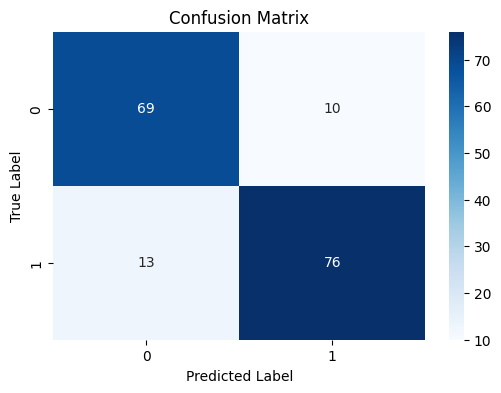

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
